In [1]:
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
stop_string = """

Atatürk Havalimanı, DTM-İstanbul Fuar Merkezi, Yenibosna, Ataköy-Şirinevler, Bahçelievler, Bakırköy-İncirli, Zeytinburnu, Merter, Davutpaşa-YTÜ, Terazidere, Otogar, Kocatepe, Sağmalcılar, Bayrampaşa-Maltepe, Topkapı-Ulubatlı, Emniyet-Fatih, Aksaray, Yenikapı,
Kirazlı-Bağcılar, Bağcılar Meydan, Üçyüzlü, Menderes, Esenler, Otogar, Kocatepe, Sağmalcılar, Bayrampaşa-Maltepe, Topkapı-Ulubatlı, Emniyet-Fatih, Aksaray, Yenikapı,
Yenikapı, Vezneciler-İstanbul Ü., Haliç, Şişhane, Taksim, Osmanbey, Şişli-Mecidiyeköy, Gayrettepe, Levent, 4.Levent, Sanayi Mahallesi, Seyrantepe, İTÜ-Ayazağa, Atatürk Oto Sanayi, Darüşşafaka, Hacıosman,
Bakırköy Sahil, Özgürlük Meydanı, İncirli, Haznedar, İlkyuva, Molla Gürani, Kirazlı-Bağcılar, Yenimahalle, Mahmutbey, İSTOÇ, İkitelli Sanayi, Turgut Özal, Siteler, Başak Konutları, Başakşehir-Metrokent, Onurkent, Şehir Hastanesi, Toplu Konutlar, Kayaşehir Merkez,
Kadıköy, Ayrılık Çeşmesi, Acıbadem, Ünalan, Göztepe, Yenisahra, Pegasus-Kozyatağı, Bostancı, Küçükyalı, Maltepe, Huzurevi, Gülsuyu, Esenkent, Hastane-Adliye, Soğanlık, Kartal, Yakacık-Adnan Kahveci, Pendik, Tavşantepe, Fevzi Çakmak-Hastane, Yayalar-Şeyhli, Kurtköy, Sabiha Gökçen Havalimanı,
Üsküdar, Fıstıkağacı, Bağlarbaşı, Altunizade, Kısıklı, Bulgurlu, Ümraniye, Çarşı, Yamanevler, Çakmak, Ihlamurkuyu, Altınşehir, İmam Hatip Lisesi, Dudullu, Necip Fazıl, Çekmeköy, Meclis, Sarıgazi, Sancaktepe, Samandıra Merkez,
Levent, Nispetiye, Etiler, Boğaziçi Ü.-Hisarüstü
Yıldız, Fulya, Mecidiyeköy, Çağlayan, Kağıthane, Nurtepe, Alibeyköy, Çırçır, Veysel Karani-Akşemsettin, Yeşilpınar, Kazım Karabekir, Yenimahalle, Karadeniz Mahallesi, Tekstilkent-Giyimkent, Oruç Reis, Göztepe Mahallesi, Mahmutbey,
Bostancı, Emin Ali Paşa, Ayşekadın, Kozyatağı, Küçükbakkalköy, İçerenköy, Kayışdağı, Mevlana, İmes, Modoko-Keyap, Dudullu, Huzur, Parseller,
Olimpiyat, Ziya Gökalp Mahallesi, İkitelli Sanayi, Masko, Bahariye, Atatürk Mahallesi, Halkalı Caddesi, 15 Temmuz, Mimar Sinan, Doğu Sanayi, 29 Ekim - Cumhuriyet, Çobançeşme, Yenibosna, Ataköy,
Gayrettepe, Kağıthane, Hasadl, Kemerburgaz, Göktürk, İhsaniye, İstanbul Havalimanı, Kargo Terminali, Taşoluk, Arnavutköy Hastane,
Maçka, Taşkışla,
Eyüp, Piyer Loti,
Bağcılar, Güneştepe, Yavuzselim, Soğanlı, Akıncılar, Güngören, Merter Tekstil Merkezi, Mehmet Akif, Zeytinburnu, Mithatpaşa, Seyitnizam-Akşemsettin, Merkezefendi, Cevizlibağ-AÖY, Topkapı, Pazartekke, Çapa-Şehremini, Fındıkzade, Haseki, Yusufpaşa, Aksaray, Laleli-İstanbul Ü., Beyazıt-Kapalıçarşı, Çemberlitaş, Sultanahmet, Gülhane, Sirkeci, Eminönü, Karaköy, Tophane, Fındıklı-Mimar Sinan Ü., Kabataş,
Taksim, Beyoğlu,
İskele Cami, Çarşı, Altıyol, Bahariye, Kilise, Moda İlkokulu, Moda Caddesi, Rızapaşa, Mühürdar, Damga Sokak, Kadıköy İDO,
Mescid-i Selam, Cebeci, Sultançiftliği, Yenimahalle, Hacı Şükrü, 50.Yıl-Baştabya, Cumhuriyet Mahallesi, Kiptaş-Venezia, Karadeniz, Taşköprü, Ali Fuat Başgil, Bosna Çukurçeşme, Sağmalcılar, Uluyol Bereç, Rami, Topçular, Demirkapı, Şehitlik, Edirnekapı, Vatan, Fetihkapı, Topkapı,
Eminönü, Küçükpazar, Cibali, Fener, Balat, Ayvansaray, Feshane, Eyüpsultan Teleferik, Eyüpsultan Devlet Hastanesi, Silahtarağa Mahallesi, Üniversite, Alibeyköy Merkez, Alibeyköy Metro, Alibeyköy Cep Otogarı,
Sirkeci, Gülhane,  Cankurtaran, Kumkapı, Yenikapı, Cerrahpaşa, K.M. Paşa, Yedikule,
Kabataş, Taksim,
Karaköy, Şişhane,
Seyrantepe, Vadistanbul,
Aşiyan, Boğaziçi Ü./Hisarüstü,
Gebze, Darıca, Osmangazi, Gebze Teknik Ü. -Fatih, Çayırova, Tuzla, İçmeler, Aydıntepe, Güzelyalı, Tersane, Kaynarca, Pendik, Yunus, Kartal, Başak, Atalar, Cevizli, Maltepe, Süreyya Plajı, İdealtepe, Küçükyalı, Bostancı, Suadiye, Erenköy, Göztepe, Feneryoku, Söğütlüçeşme, Ayrılık çeşmesi, Üsküdar, Sirkeci, Yenikapı, Kazlıçeşme, Zeytinburnu, Yenimahalle, Bakırköy, Ataköy, Yeşilyurt, Yeşilköy, Florya Akvaryum, Florya, K.Çekmece, Mustafa Kemal, Halkalı,
Bahçeşehir, Halkalı


"""

metro_lines = stop_string.strip().split('\n')

formatted_lines = []
for line in metro_lines:
    stop_names = [stop_n.strip() for stop_n in line.split(',') if stop_n.strip()]
    
    formatted_names = ', '.join([f'"{stop_n}"' for stop_n in stop_names])
    
    formatted_lines.append(formatted_names)

final_output = "\n".join(formatted_lines)

print(final_output)

"Atatürk Havalimanı", "DTM-İstanbul Fuar Merkezi", "Yenibosna", "Ataköy-Şirinevler", "Bahçelievler", "Bakırköy-İncirli", "Zeytinburnu", "Merter", "Davutpaşa-YTÜ", "Terazidere", "Otogar", "Kocatepe", "Sağmalcılar", "Bayrampaşa-Maltepe", "Topkapı-Ulubatlı", "Emniyet-Fatih", "Aksaray", "Yenikapı"
"Kirazlı-Bağcılar", "Bağcılar Meydan", "Üçyüzlü", "Menderes", "Esenler", "Otogar", "Kocatepe", "Sağmalcılar", "Bayrampaşa-Maltepe", "Topkapı-Ulubatlı", "Emniyet-Fatih", "Aksaray", "Yenikapı"
"Yenikapı", "Vezneciler-İstanbul Ü.", "Haliç", "Şişhane", "Taksim", "Osmanbey", "Şişli-Mecidiyeköy", "Gayrettepe", "Levent", "4.Levent", "Sanayi Mahallesi", "Seyrantepe", "İTÜ-Ayazağa", "Atatürk Oto Sanayi", "Darüşşafaka", "Hacıosman"
"Bakırköy Sahil", "Özgürlük Meydanı", "İncirli", "Haznedar", "İlkyuva", "Molla Gürani", "Kirazlı-Bağcılar", "Yenimahalle", "Mahmutbey", "İSTOÇ", "İkitelli Sanayi", "Turgut Özal", "Siteler", "Başak Konutları", "Başakşehir-Metrokent", "Onurkent", "Şehir Hastanesi", "Toplu Konutlar

In [13]:
from unidecode import unidecode

print(unidecode(final_output))

"Ataturk Havalimani", "DTM-Istanbul Fuar Merkezi", "Yenibosna", "Atakoy-Sirinevler", "Bahcelievler", "Bakirkoy-Incirli", "Zeytinburnu", "Merter", "Davutpasa-YTU", "Terazidere", "Otogar", "Kocatepe", "Sagmalcilar", "Bayrampasa-Maltepe", "Topkapi-Ulubatli", "Emniyet-Fatih", "Aksaray", "Yenikapi"
"Kirazli-Bagcilar", "Bagcilar Meydan", "Ucyuzlu", "Menderes", "Esenler", "Otogar", "Kocatepe", "Sagmalcilar", "Bayrampasa-Maltepe", "Topkapi-Ulubatli", "Emniyet-Fatih", "Aksaray", "Yenikapi"
"Yenikapi", "Vezneciler-Istanbul U.", "Halic", "Sishane", "Taksim", "Osmanbey", "Sisli-Mecidiyekoy", "Gayrettepe", "Levent", "4.Levent", "Sanayi Mahallesi", "Seyrantepe", "ITU-Ayazaga", "Ataturk Oto Sanayi", "Darussafaka", "Haciosman"
"Bakirkoy Sahil", "Ozgurluk Meydani", "Incirli", "Haznedar", "Ilkyuva", "Molla Gurani", "Kirazli-Bagcilar", "Yenimahalle", "Mahmutbey", "ISTOC", "Ikitelli Sanayi", "Turgut Ozal", "Siteler", "Basak Konutlari", "Basaksehir-Metrokent", "Onurkent", "Sehir Hastanesi", "Toplu Konutlar

In [ ]:
metro_lines = {
    "M1A": ["Ataturk Havalimani", "DTM-Istanbul Fuar Merkezi", "Yenibosna", "Atakoy-Sirinevler", "Bahcelievler", "Bakirkoy-Incirli", "Zeytinburnu", "Merter", "Davutpasa-YTU", "Terazidere", "Otogar", "Kocatepe", "Sagmalcilar", "Bayrampasa-Maltepe", "Topkapi-Ulubatli", "Emniyet-Fatih", "Aksaray", "Yenikapi"
],

    "M1B": ["Kirazli-Bagcilar", "Bagcilar Meydan", "Ucyuzlu", "Menderes", "Esenler", "Otogar", "Kocatepe", "Sagmalcilar", "Bayrampasa-Maltepe", "Topkapi-Ulubatli", "Emniyet-Fatih", "Aksaray", "Yenikapi"

],
    "M2": ["Yenikapi", "Vezneciler-Istanbul U.", "Halic", "Sishane", "Taksim", "Osmanbey", "Sisli-Mecidiyekoy", "Gayrettepe", "Levent", "4.Levent", "Sanayi Mahallesi", "Seyrantepe", "ITU-Ayazaga", "Ataturk Oto Sanayi", "Darussafaka", "Haciosman"

],
    "M3": ["Bakirkoy Sahil", "Ozgurluk Meydani", "Incirli", "Haznedar", "Ilkyuva", "Molla Gurani", "Kirazli-Bagcilar", "Yenimahalle", "Mahmutbey", "ISTOC", "Ikitelli Sanayi", "Turgut Ozal", "Siteler", "Basak Konutlari", "Basaksehir-Metrokent", "Onurkent", "Sehir Hastanesi", "Toplu Konutlar", "Kayasehir Merkez"

],
    "M4": ["Yenikapi", "Ayrilik Cesmesi", "Acibadem", "Unalan", "Goztepe", "Yenisahra", "Pegasus-Kozyatagi", "Bostanci", "Kucukyali", "Maltepe", "Huzurevi", "Gulsuyu", "Esenkent", "Hastane-Adliye", "Soganlik", "Kartal", "Yakacik-Adnan Kahveci", "Pendik", "Tavsantepe", "Fevzi Cakmak-Hastane", "Yayalar-Seyhli", "Kurtkoy", "Bulgurlu"

],
    "M5": ["Üsküdar", "Fıstıkağacı", "Bağlarbaşı", "Altunizade", "Kısıklı", "Bulgurlu", "Ümraniye", "Çarşı", "Yamanevler", "Çakmak", "Ihlamurkuyu", "Altınşehir", "İmam Hatip Lisesi", "Dudullu", "Necip Fazıl", "Çekmeköy", "Meclis", "Sarıgazi", "Sancaktepe", "Samandıra Merkez"
],
#     "M6": ["Levent", "Nispetiye", "Etiler", "Boğaziçi Ü.-Hisarüstü"
# ],
#     "M7": ["Yıldız", "Fulya", "Mecidiyeköy", "Çağlayan", "Kağıthane", "Nurtepe", "Alibeyköy", "Çırçır", "Veysel Karani-Akşemsettin", "Yeşilpınar", "Kazım Karabekir", "Yenimahalle", "Karadeniz Mahallesi", "Tekstilkent-Giyimkent", "Oruç Reis", "Göztepe Mahallesi", "Mahmutbey"
#  ],
#     "M8": ["Bostancı", "Emin Ali Paşa", "Ayşekadın", "Kozyatağı", "Küçükbakkalköy", "İçerenköy", "Kayışdağı", "Mevlana", "İmes", "Modoko-Keyap", "Dudullu", "Huzur", "Parseller"
# ],
#     "M9": ["Olimpiyat", "Ziya Gökalp Mahallesi", "İkitelli Sanayi", "Masko", "Bahariye", "Atatürk Mahallesi", "Halkalı Caddesi", "15 Temmuz", "Mimar Sinan", "Doğu Sanayi", "29 Ekim - Cumhuriyet", "Çobançeşme", "Yenibosna", "Ataköy"
# ],
#     "M11": ["Gayrettepe", "Kağıthane", "Hasadl", "Kemerburgaz", "Göktürk", "İhsaniye", "İstanbul Havalimanı", "Kargo Terminali", "Taşoluk", "Arnavutköy Hastane"
# ],
#     "TF1": ["Maçka", "Taşkışla"
# ],
#     "TF2": ["Eyüp", "Piyer Loti"
# ],
#     "T1": ["Bağcılar", "Güneştepe", "Yavuzselim", "Soğanlı", "Akıncılar", "Güngören", "Merter Tekstil Merkezi", "Mehmet Akif", "Zeytinburnu", "Mithatpaşa", "Seyitnizam-Akşemsettin", "Merkezefendi", "Cevizlibağ-AÖY", "Topkapı", "Pazartekke", "Çapa-Şehremini", "Fındıkzade", "Haseki", "Yusufpaşa", "Aksaray", "Laleli-İstanbul Ü.", "Beyazıt-Kapalıçarşı", "Çemberlitaş", "Sultanahmet", "Gülhane", "Sirkeci", "Eminönü", "Karaköy", "Tophane", "Fındıklı-Mimar Sinan Ü.", "Kabataş"
# ],
#     "T2": ["Taksim", "Beyoğlu"
# ],
#     "T3": ["İskele Cami", "Çarşı", "Altıyol", "Bahariye", "Kilise", "Moda İlkokulu", "Moda Caddesi", "Rızapaşa", "Mühürdar", "Damga Sokak", "Kadıköy İDO"
# ],
#     "T4": ["Mescid-i Selam", "Cebeci", "Sultançiftliği", "Yenimahalle", "Hacı Şükrü", "50.Yıl-Baştabya", "Cumhuriyet Mahallesi", "Kiptaş-Venezia", "Karadeniz", "Taşköprü", "Ali Fuat Başgil", "Bosna Çukurçeşme", "Sağmalcılar", "Uluyol Bereç", "Rami", "Topçular", "Demirkapı", "Şehitlik", "Edirnekapı", "Vatan", "Fetihkapı", "Topkapı"
# ],
#     "T5": ["Eminönü", "Küçükpazar", "Cibali", "Fener", "Balat", "Ayvansaray", "Feshane", "Eyüpsultan Teleferik", "Eyüpsultan Devlet Hastanesi", "Silahtarağa Mahallesi", "Üniversite", "Alibeyköy Merkez", "Alibeyköy Metro", "Alibeyköy Cep Otogarı"
# ],
#     "T6": ["Sirkeci", "Gülhane", "Cankurtaran", "Kumkapı", "Yenikapı", "Cerrahpaşa", "K.M. Paşa", "Yedikule"
# ],
#     "F1": ["Kabataş", "Taksim"
# ],
#     "F2": ["Karaköy", "Şişhane"
# ],
#     "F3": ["Seyrantepe", "Vadistanbul"
# ],
#     "F4": ["Aşiyan", "Boğaziçi Ü./Hisarüstü"
# ],
#     "B1": ["Gebze", "Darıca", "Osmangazi", "Gebze Teknik Ü. -Fatih", "Çayırova", "Tuzla", "İçmeler", "Aydıntepe", "Güzelyalı", "Tersane", "Kaynarca", "Pendik", "Yunus", "Kartal", "Başak", "Atalar", "Cevizli", "Maltepe", "Süreyya Plajı", "İdealtepe", "Küçükyalı", "Bostancı", "Suadiye", "Erenköy", "Göztepe", "Feneryoku", "Söğütlüçeşme", "Ayrılık çeşmesi", "Üsküdar", "Sirkeci", "Yenikapı", "Kazlıçeşme", "Zeytinburnu", "Yenimahalle", "Bakırköy", "Ataköy", "Yeşilyurt", "Yeşilköy", "Florya Akvaryum", "Florya", "K.Çekmece", "Mustafa Kemal", "Halkalı"
# ],
#     "B2": ["Bahçeşehir", "Halkalı"
# ]

}

line_colors = {
"M1A": "brown",
"M1B": "red",
"M2": "green",
"M3": "cyan",
"M4": "magenta",
"M5": "purple",
# "M6": "tan",
# "M7": "violet",
# "M8": "blue",
# "M9": "yellow",
# "M11": "orchid",
# "TF1": "turquoise",
# "TF2": "turquoise",
# "T1": "navy",
# "T2": "lightsteelblue",
# "T3": "brown",
# "T4": "orange",
# "T5": "mediumpurple",
# "T6": "lightpink",
# "F1": "darkkhaki",
# "F2": "darkkhaki",
# "F3": "darkkhaki",
# "F4": "darkkhaki",
# "B1": "dimgrey",
# "B2": "slategray"

}

coordinates = {
"M1A": [
    (40.97, 29.05), (40.98, 29.1), (40.99, 29.15), (41.0, 29.2), (41.01, 29.25),
    (41.02, 29.3), (41.03, 29.35), (41.04, 29.4), (41.05, 29.45), (41.06, 29.5),
    (41.07, 29.55), (41.08, 29.6), (41.09, 29.65), (41.1, 29.7), (41.11, 29.75),
    (41.12, 29.8), (41.0, 29.85), (41.14, 29.9)
],

"M1B": [
    (40.97, 29.05), (40.98, 29.1), (40.99, 29.15), (41.0, 29.2), (41.01, 29.25),
    (41.02, 29.3), (41.03, 29.35), (41.04, 29.4), (41.05, 29.45), (41.06, 29.5),
    (41.07, 29.55), (41.1, 29.6), (41.09, 29.65)
],

"M2": [
    (40.3, 29.0), (41.2, 29.2), (41.19, 29.22), (41.19, 29.24), (41.18, 29.26),
    (41.16, 29.3), (41.17, 29.36), (41.18, 29.42), (41.19, 29.48), (41.2, 29.54),
    (41.21, 29.6), (41.22, 29.66), (41.23, 29.72), (41.24, 29.78), (41.25, 29.84),
    (41.35, 29.93)
]
,

"M3": [
    (40.85, 29.2), (40.87, 29.22), (40.90, 29.24), (40.93, 29.26), (40.95, 29.28),
    (40.98, 29.3), (41.01, 29.36), (40.99, 29.42), (40.98, 29.48), (41.04, 29.54),
    (41.05, 29.6), (41.06, 29.66), (41.07, 29.72), (41.08, 29.78), (41.09, 29.84),
    (41.1, 29.9), (41.11, 29.96), (41.12, 30.02), (41.13, 30.08)
]
,
        
"M4": [
    (41.2, 29.0), (41.22, 28.9), (41.23, 28.93), (41.24, 29.00),
    (41.25, 29.14), (41.26, 29.16), (41.27, 29.18), (41.28, 29.20),
    (41.29, 29.22), (41.3, 29.24), (41.3, 29.26), (41.31, 29.2),
    (41.32, 29.21), (41.33, 29.22), (41.34, 29.23), (41.35, 29.24),
    (41.36, 29.25), (41.37, 29.26), (41.38, 29.27), (41.39, 29.28),
    (41.39, 29.29), (41.39, 29.30), (41.4, 29.29)
],
"M5": [
   (41.22, 29.30), (41.24, 29.31), (41.30, 29.32), (41.40, 29.32), (41.46, 29.32),
    (41.49, 29.24), (41.50, 29.06), (41.53, 29.07), (41.54, 29.08), (41.60, 29.09),
    (41.65, 29.10), (41.66, 29.11), (41.67, 29.12), (41.68, 29.13), (41.69, 29.14),
    (41.70, 29.20), (41.71, 29.22), (41.72, 29.24), (41.73, 29.26), (41.74, 29.28)
]
}




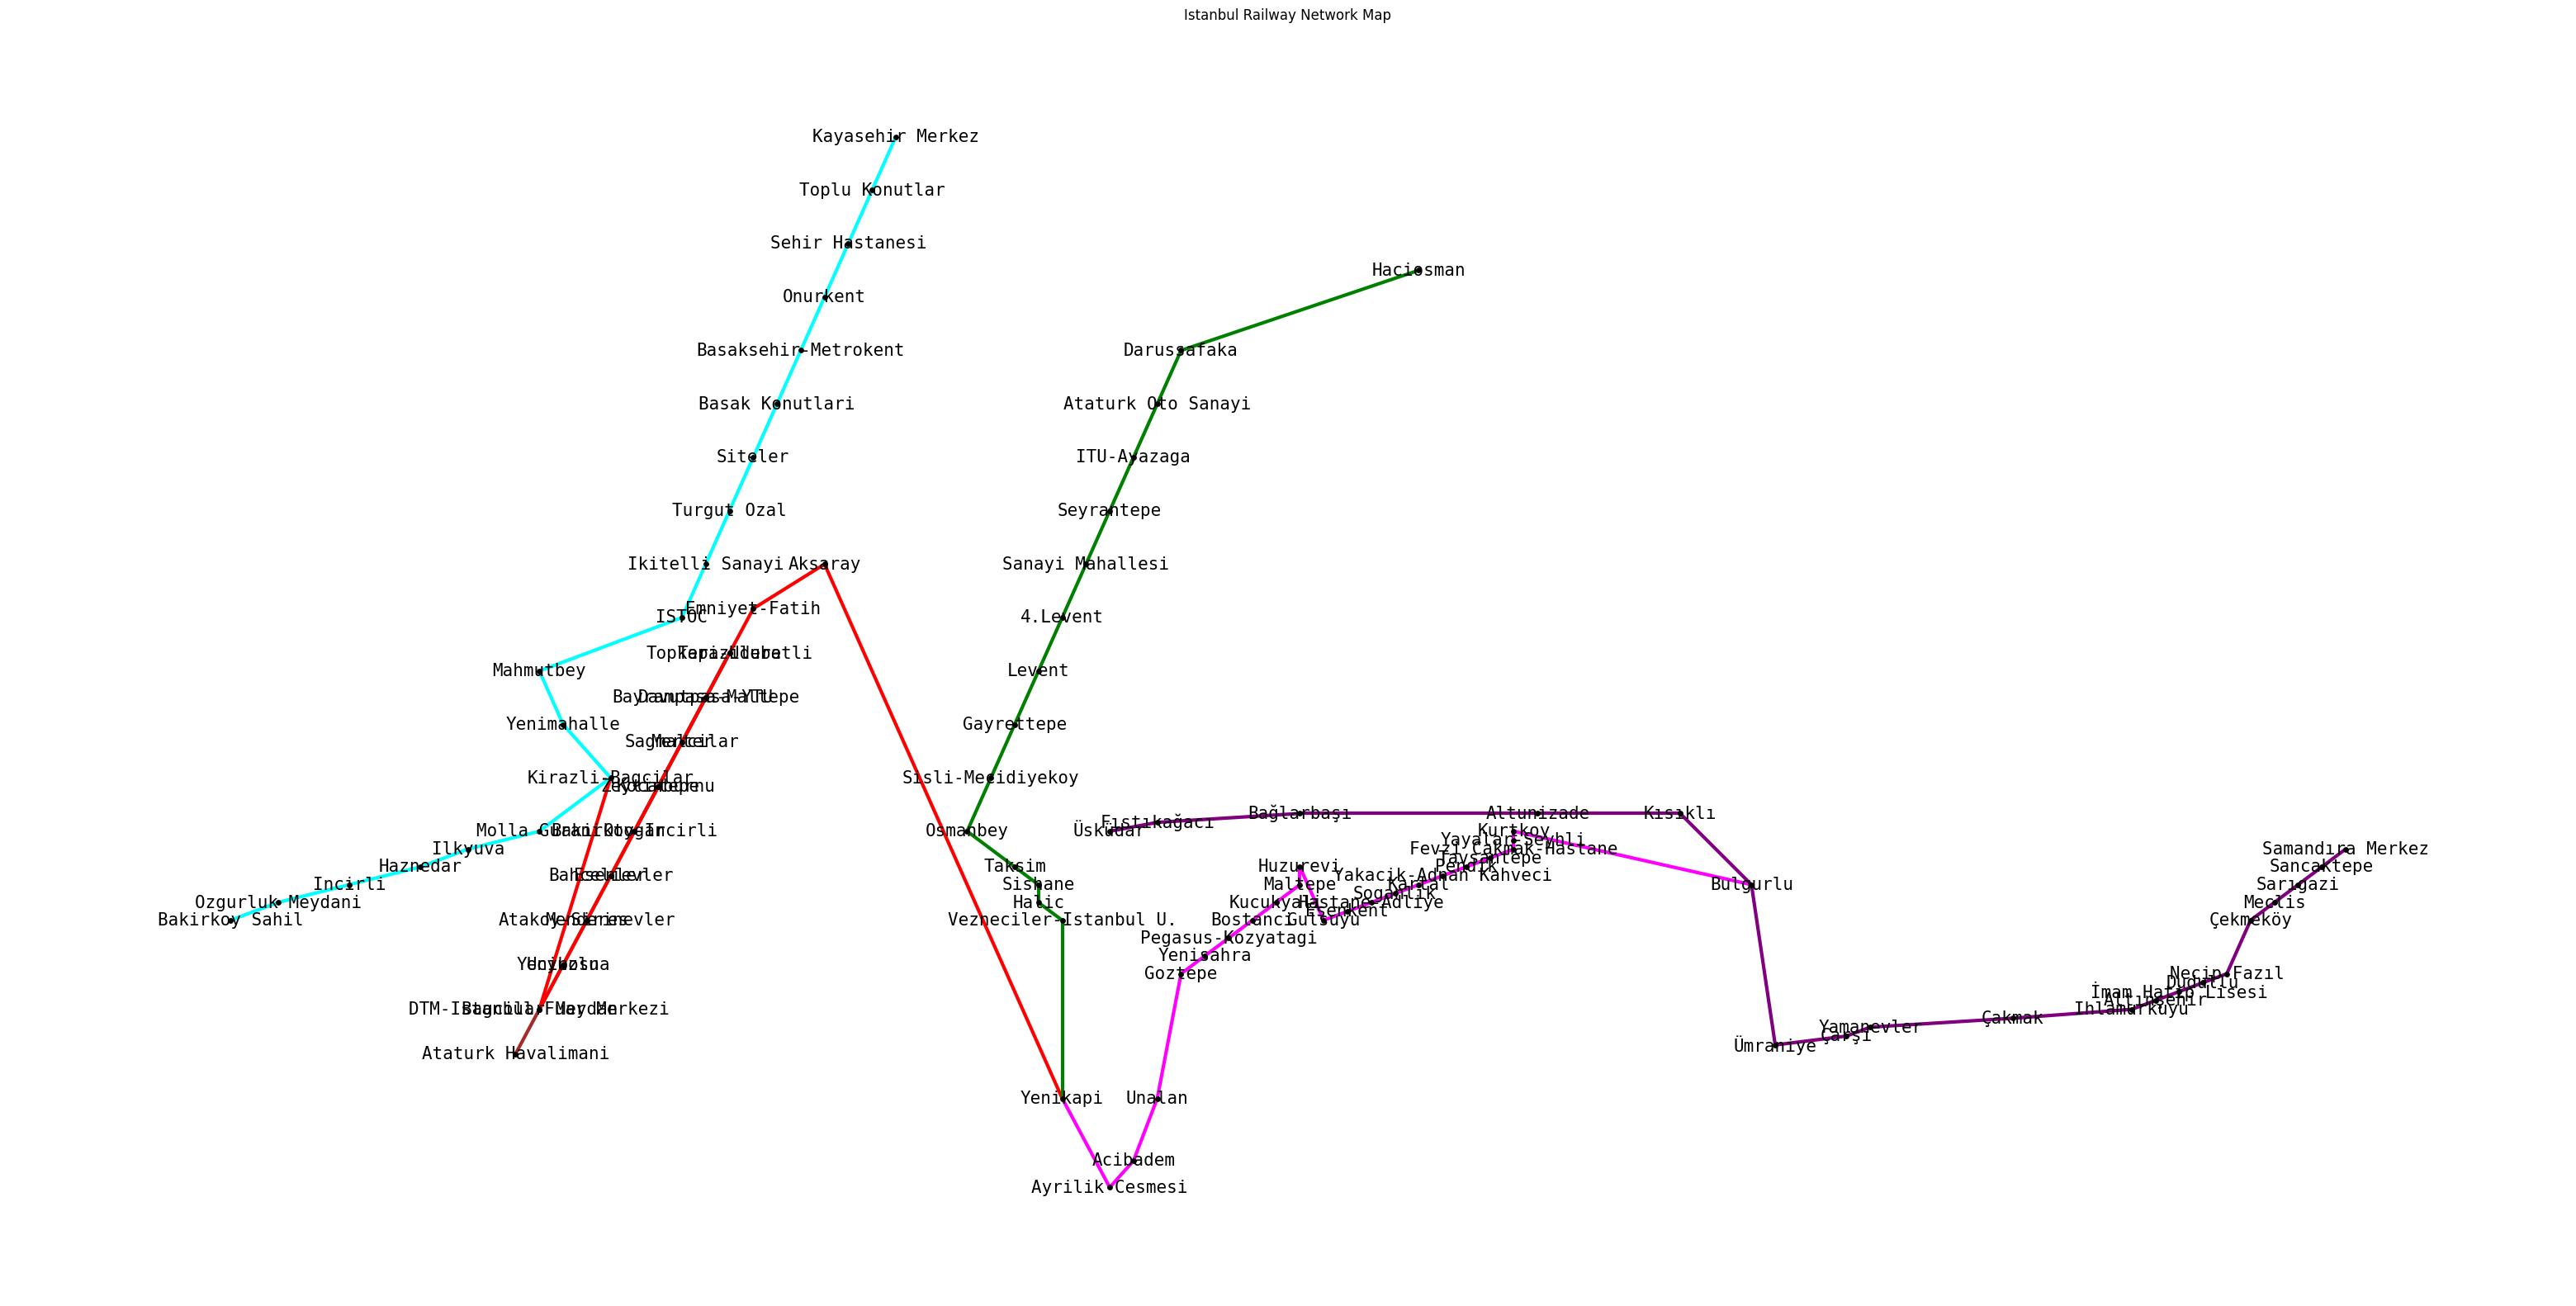

In [248]:
istanbul_graph = nx.Graph()


for line, stops in metro_lines.items():
    stop_coordinates = coordinates[line]
    # #Code bellow is to check if the line has enough cooridnates coresponding to stops
    if len(stop_coordinates) != len(stops):
        print(f"Coordinate mismatch for line {line}. Expected {len(stops)} coordinates, got {len(stop_coordinates)}.")
        continue 

    for i in range(len(stops) -1):
        istanbul_graph.add_node(stops[i], npos = coordinates[line][i])
        istanbul_graph.add_node(stops[i+1], npos=coordinates[line][i+1])

        istanbul_graph.add_edge(stops[i], stops[i+1], color = line_colors[line]) 
plt.figure(figsize=(40,20))
edge_colours = [istanbul_graph[start][end].get('color', 'gray') for start, end in istanbul_graph.edges()]
edge_labels = {(start,end): istanbul_graph[start][end] for start, end in istanbul_graph.edges()}

# position = nx.bipartite_layout(istanbul_graph, stops, align='vertical') #otomatik bağlamak için
# position = nx.spectral_layout(istanbul_graph)
# position = nx.planar_layout(istanbul_graph)
# position = nx.shell_layout(istanbul_graph)
# position = nx.circular_layout(istanbul_graph)
# position = nx.kamada_kawai_layout(istanbul_graph)
# position = nx.spring_layout(istanbul_graph, seed= 42)

position = nx.get_node_attributes(istanbul_graph, 'npos')


nx.draw_networkx_nodes(istanbul_graph, position, node_size= 15, node_color= "black")
nx.draw_networkx_labels(istanbul_graph, position, font_size= 15, font_family= "monospace")
nx.draw_networkx_edges(istanbul_graph, position, edge_color=edge_colours,width= 3)


plt.title("Istanbul Railway Network Map")
plt.axis("off")
plt.show()


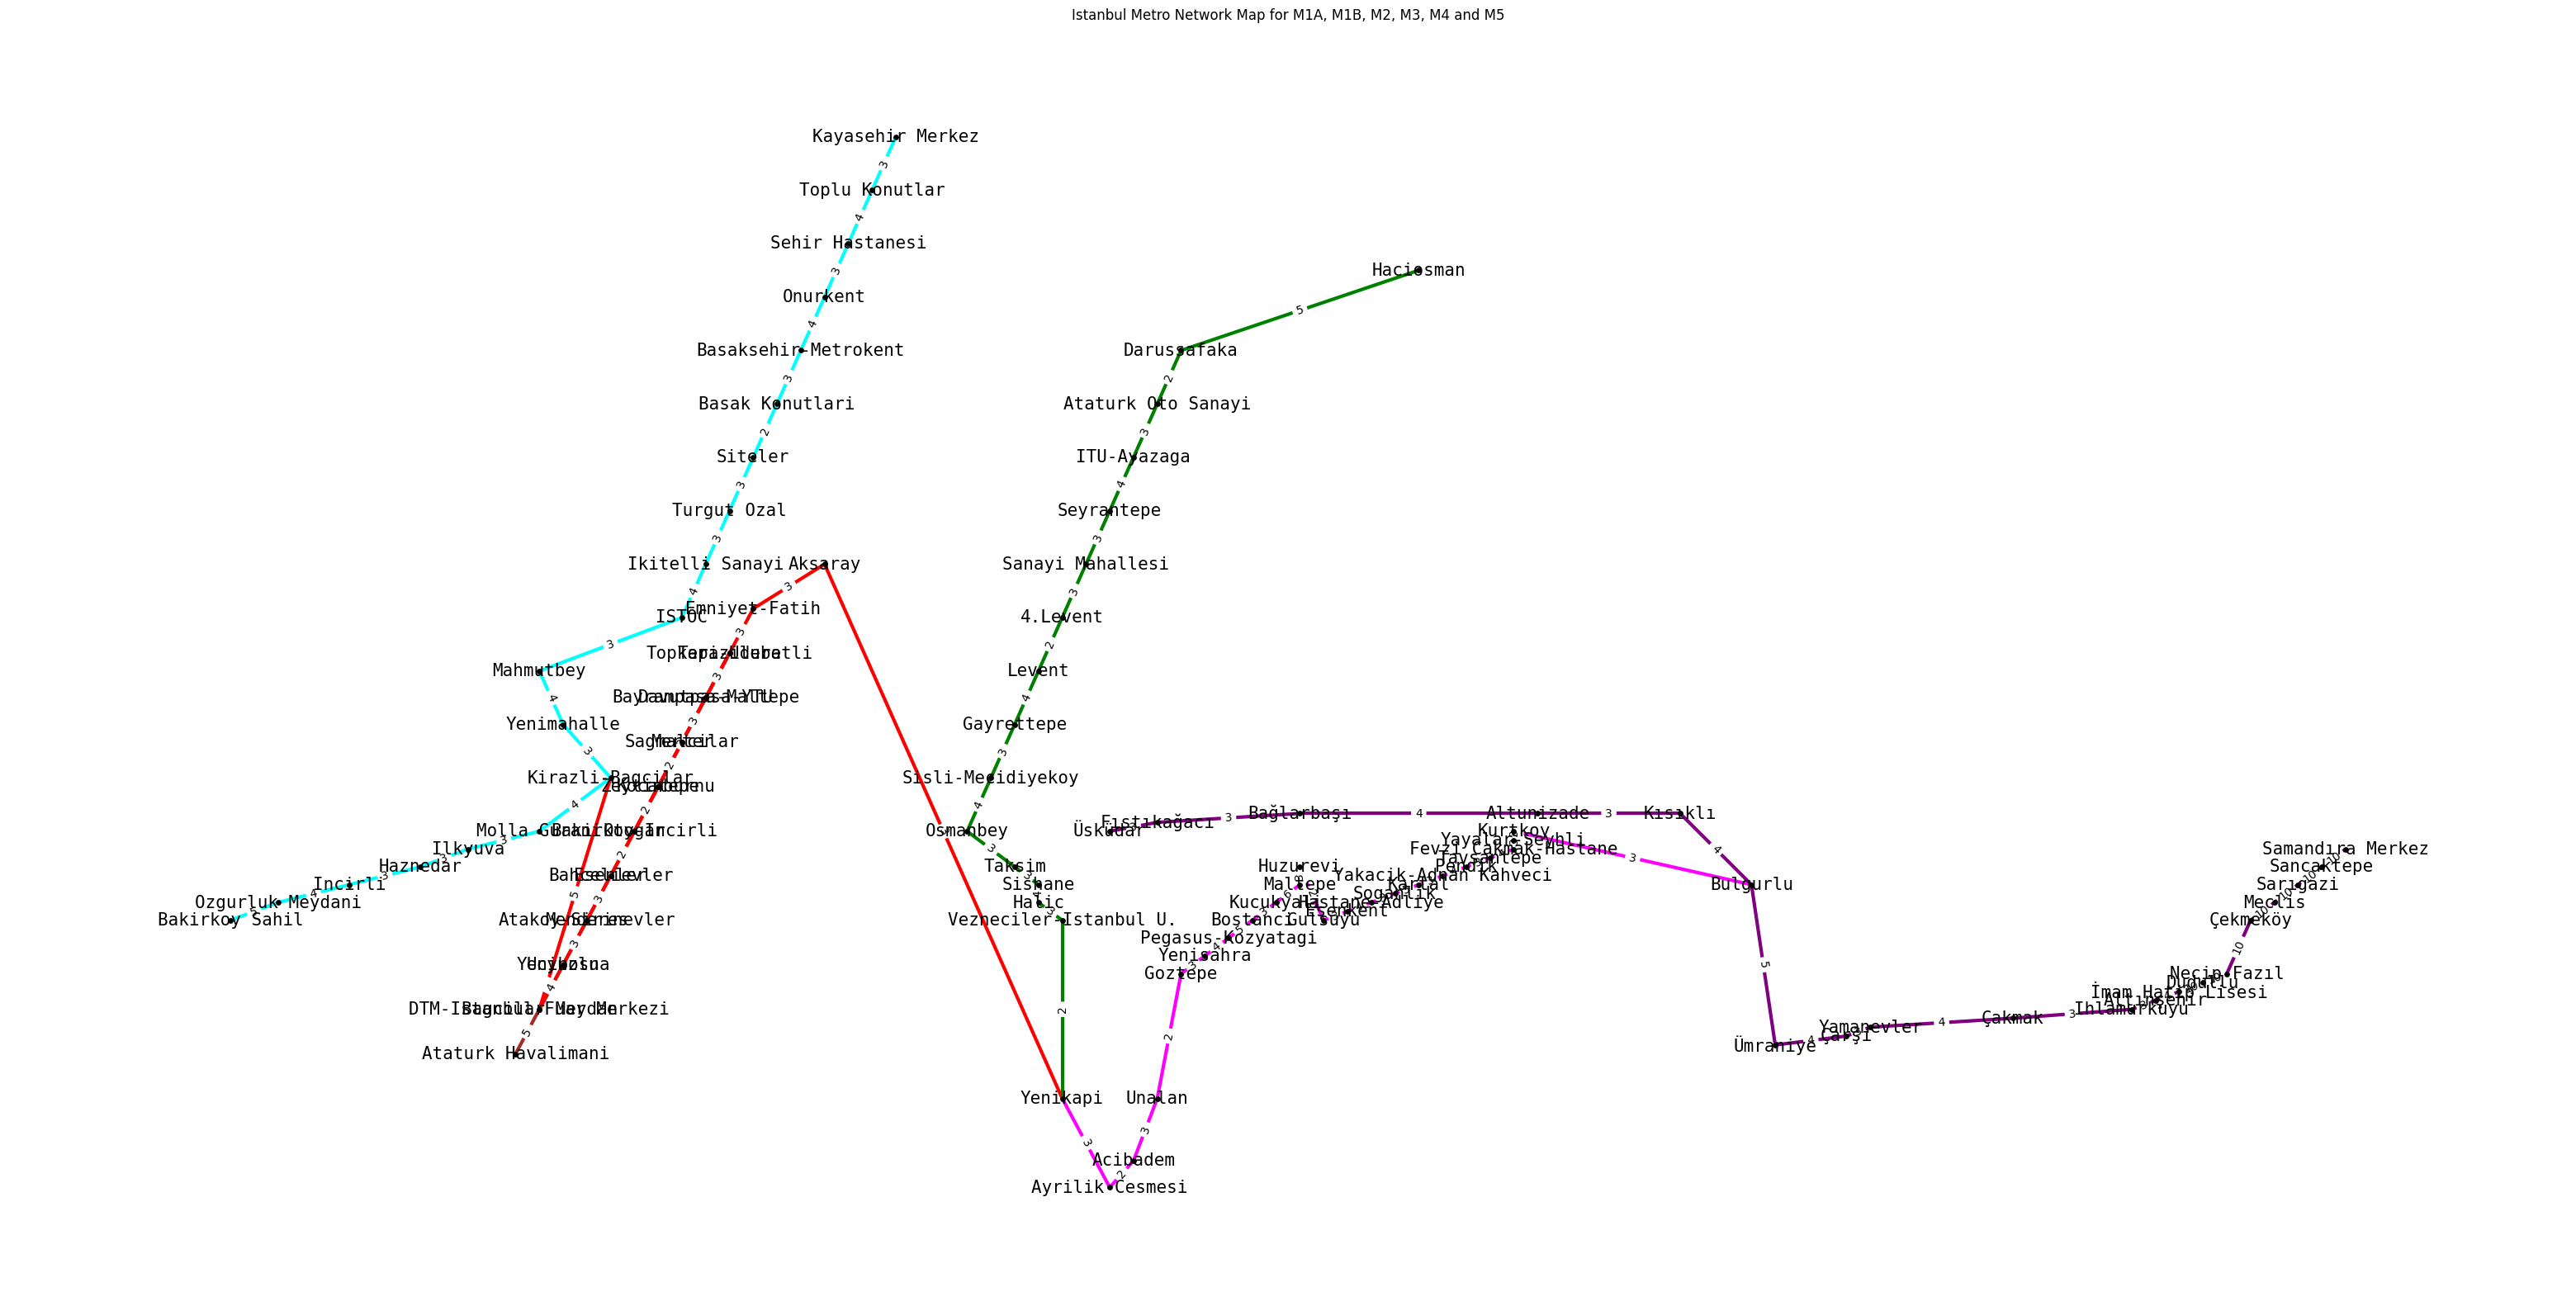

In [264]:
def create_metro_graph(metro_lines, coordinates, line_colors):
    istanbul_graph = nx.Graph()
    for line, stops in metro_lines.items():

        for i in range(len(stops) - 1):
            istanbul_graph.add_node(stops[i], npos=coordinates[line][i])
            istanbul_graph.add_node(stops[i+1], npos=coordinates[line][i+1])

            station1 = stops[i]  
            station2 = stops[i+1]  
            weight = calculate_weight(station1, station2)  

            istanbul_graph.add_edge(station1, station2, color=line_colors[line], weight=weight)
    
    return istanbul_graph

def calculate_weight(station1, station2):
    travel_times = {
        ("Ataturk Havalimani", "DTM-Istanbul Fuar Merkezi"): 5,
        ("DTM-Istanbul Fuar Merkezi", "Ataturk Havalimani"): 5,
        ("DTM-Istanbul Fuar Merkezi", "Yenibosna"): 4,
        ("Yenibosna", "DTM-Istanbul Fuar Merkezi"): 4,
        ("Yenibosna", "Atakoy-Sirinevler"): 3,
        ("Atakoy-Sirinevler", "Yenibosna"): 3,
        ("Atakoy-Sirinevler", "Bahcelievler"): 3,
        ("Bahcelievler", "Atakoy-Sirinevler"): 3,
        ("Bahcelievler", "Bakirkoy-Incirli"): 4,
        ("Bakirkoy-Incirli", "Bahcelievler"): 4,
        ("Bakirkoy-Incirli", "Zeytinburnu"): 4,
        ("Zeytinburnu", "Bakirkoy-Incirli"): 4,
        ("Zeytinburnu", "Merter"): 2,
        ("Merter", "Zeytinburnu"): 2,
        ("Merter", "Davutpasa-YTU"): 3,
        ("Davutpasa-YTU", "Merter"): 3,
        ("Davutpasa-YTU", "Terazidere"): 2,
        ("Terazidere", "Davutpasa-YTU"): 2,
        ("Terazidere", "Otogar"): 2,
        ("Otogar", "Terazidere"): 2,
        ("Otogar", "Kocatepe"): 2,
        ("Kocatepe", "Otogar"): 2,
        ("Kocatepe", "Sagmalcilar"): 2,
        ("Sagmalcilar", "Kocatepe"): 2,
        ("Sagmalcilar", "Bayrampasa-Maltepe"): 3,
        ("Bayrampasa-Maltepe", "Sagmalcilar"): 3,
        ("Bayrampasa-Maltepe", "Topkapi-Ulubatli"): 3,
        ("Topkapi-Ulubatli", "Bayrampasa-Maltepe"): 3,
        ("Topkapi-Ulubatli", "Emniyet-Fatih"): 3,
        ("Emniyet-Fatih", "Topkapi-Ulubatli"): 3,
        ("Emniyet-Fatih", "Aksaray"): 3,
        ("Aksaray", "Emniyet-Fatih"): 3,
        ("Aksaray", "Yenikapi"): 3,
        ("Yenikapi", "Aksaray"): 3,
        ("Kirazli-Bagcilar", "Bagcilar Meydan"): 5,
        ("Bagcilar Meydan", "Kirazli-Bagcilar"): 5,
        ("Bagcilar Meydan", "Ucyuzlu"): 4,
        ("Ucyuzlu", "Bagcilar Meydan"): 4,
        ("Ucyuzlu", "Menderes"): 3,
        ("Menderes", "Ucyuzlu"): 3,
        ("Menderes", "Esenler"): 3,
        ("Esenler", "Menderes"): 3,
        ("Esenler", "Otogar"): 2,
        ("Otogar", "Esenler"): 2,
        ("Otogar", "Kocatepe"): 2,
        ("Kocatepe", "Otogar"): 2,
        ("Kocatepe", "Sagmalcilar"): 2,
        ("Sagmalcilar", "Kocatepe"): 2,
        ("Sagmalcilar", "Bayrampasa-Maltepe"): 3,
        ("Bayrampasa-Maltepe", "Sagmalcilar"): 3,
        ("Bayrampasa-Maltepe", "Topkapi-Ulubatli"): 3,
        ("Topkapi-Ulubatli", "Bayrampasa-Maltepe"): 3,
        ("Topkapi-Ulubatli", "Emniyet-Fatih"): 3,
        ("Emniyet-Fatih", "Topkapi-Ulubatli"): 3,
        ("Emniyet-Fatih", "Aksaray"): 3,
        ("Aksaray", "Emniyet-Fatih"): 3,
        ("Aksaray", "Yenikapi"): 3,
        ("Yenikapi", "Aksaray"): 3,
        ("Yenikapi", "Vezneciler-Istanbul U."): 2,
        ("Vezneciler-Istanbul U.", "Yenikapi"): 2,
        ("Vezneciler-Istanbul U.", "Halic"): 3,
        ("Halic", "Vezneciler-Istanbul U."): 3,
        ("Halic", "Sishane"): 4,
        ("Sishane", "Halic"): 4,
        ("Sishane", "Taksim"): 3,
        ("Taksim", "Sishane"): 3,
        ("Taksim", "Osmanbey"): 3,
        ("Osmanbey", "Taksim"): 3,
        ("Osmanbey", "Sisli-Mecidiyekoy"): 4,
        ("Sisli-Mecidiyekoy", "Osmanbey"): 4,
        ("Sisli-Mecidiyekoy", "Gayrettepe"): 3,
        ("Gayrettepe", "Sisli-Mecidiyekoy"): 3,
        ("Gayrettepe", "Levent"): 4,
        ("Levent", "Gayrettepe"): 4,
        ("Levent", "4.Levent"): 2,
        ("4.Levent", "Levent"): 2,
        ("4.Levent", "Sanayi Mahallesi"): 3,
        ("Sanayi Mahallesi", "4.Levent"): 3,
        ("Sanayi Mahallesi", "Seyrantepe"): 3,
        ("Seyrantepe", "Sanayi Mahallesi"): 3,
        ("Seyrantepe", "ITU-Ayazaga"): 4,
        ("ITU-Ayazaga", "Seyrantepe"): 4,
        ("ITU-Ayazaga", "Ataturk Oto Sanayi"): 3,
        ("Ataturk Oto Sanayi", "ITU-Ayazaga"): 3,
        ("Ataturk Oto Sanayi", "Darussafaka"): 2,
        ("Darussafaka", "Ataturk Oto Sanayi"): 2,
        ("Darussafaka", "Haciosman"): 5,
        ("Haciosman", "Darussafaka"): 5,
         ("Bakirkoy Sahil", "Ozgurluk Meydani"): 5,
        ("Ozgurluk Meydani", "Bakirkoy Sahil"): 5,
        ("Ozgurluk Meydani", "Incirli"): 4,
        ("Incirli", "Ozgurluk Meydani"): 4,
        ("Incirli", "Haznedar"): 3,
        ("Haznedar", "Incirli"): 3,
        ("Haznedar", "Ilkyuva"): 3,
        ("Ilkyuva", "Haznedar"): 3,
        ("Ilkyuva", "Molla Gurani"): 3,
        ("Molla Gurani", "Ilkyuva"): 3,
        ("Molla Gurani", "Kirazli-Bagcilar"): 4,
        ("Kirazli-Bagcilar", "Molla Gurani"): 4,
        ("Kirazli-Bagcilar", "Yenimahalle"): 3,
        ("Yenimahalle", "Kirazli-Bagcilar"): 3,
        ("Yenimahalle", "Mahmutbey"): 4,
        ("Mahmutbey", "Yenimahalle"): 4,
        ("Mahmutbey", "ISTOC"): 3,
        ("ISTOC", "Mahmutbey"): 3,
        ("ISTOC", "Ikitelli Sanayi"): 4,
        ("Ikitelli Sanayi", "ISTOC"): 4,
        ("Ikitelli Sanayi", "Turgut Ozal"): 3,
        ("Turgut Ozal", "Ikitelli Sanayi"): 3,
        ("Turgut Ozal", "Siteler"): 3,
        ("Siteler", "Turgut Ozal"): 3,
        ("Siteler", "Basak Konutlari"): 2,
        ("Basak Konutlari", "Siteler"): 2,
        ("Basak Konutlari", "Basaksehir-Metrokent"): 3,
        ("Basaksehir-Metrokent", "Basak Konutlari"): 3,
        ("Basaksehir-Metrokent", "Onurkent"): 4,
        ("Onurkent", "Basaksehir-Metrokent"): 4,
        ("Onurkent", "Sehir Hastanesi"): 3,
        ("Sehir Hastanesi", "Onurkent"): 3,
        ("Sehir Hastanesi", "Toplu Konutlar"): 4,
        ("Toplu Konutlar", "Sehir Hastanesi"): 4,
        ("Toplu Konutlar", "Kayasehir Merkez"): 3,
        ("Kayasehir Merkez", "Toplu Konutlar"): 3,
         ("Yenikapi", "Ayrilik Cesmesi"): 3,
        ("Ayrilik Cesmesi", "Yenikapi"): 3,
        ("Ayrilik Cesmesi", "Acibadem"): 2,
        ("Acibadem", "Ayrilik Cesmesi"): 2,
        ("Acibadem", "Unalan"): 3,
        ("Unalan", "Acibadem"): 3,
        ("Unalan", "Goztepe"): 2,
        ("Goztepe", "Unalan"): 2,
        ("Goztepe", "Yenisahra"): 3,
        ("Yenisahra", "Goztepe"): 3,
        ("Yenisahra", "Pegasus-Kozyatagi"): 4,
        ("Pegasus-Kozyatagi", "Yenisahra"): 4,
        ("Pegasus-Kozyatagi", "Bostanci"): 5,
        ("Bostanci", "Pegasus-Kozyatagi"): 5,
        ("Bostanci", "Kucukyali"): 3,
        ("Kucukyali", "Bostanci"): 5,
        ("Kucukyali", "Maltepe"): 6,
        ("Maltepe", "Kucukyali"): 5,
        ("Maltepe", "Huzurevi"): 3,
        ("Huzurevi", "Maltepe"): 3,
        ("Huzurevi", "Gulsuyu"): 2,
        ("Gulsuyu", "Huzurevi"): 2,
        ("Gulsuyu", "Esenkent"): 3,
        ("Esenkent", "Gulsuyu"): 3,
        ("Esenkent", "Hastane-Adliye"): 4,
        ("Hastane-Adliye", "Esenkent"): 4,
        ("Hastane-Adliye", "Soganlik"): 3,
        ("Soganlik", "Hastane-Adliye"): 3,
        ("Soganlik", "Kartal"): 5,
        ("Kartal", "Soganlik"): 5,
        ("Kartal", "Yakacik-Adnan Kahveci"): 3,
        ("Yakacik-Adnan Kahveci", "Kartal"): 3,
        ("Yakacik-Adnan Kahveci", "Pendik"): 4,
        ("Pendik", "Yakacik-Adnan Kahveci"): 4,
        ("Pendik", "Tavsantepe"): 3,
        ("Tavsantepe", "Pendik"): 3,
        ("Tavsantepe", "Fevzi Cakmak-Hastane"): 4,
        ("Fevzi Cakmak-Hastane", "Tavsantepe"): 4,
        ("Fevzi Cakmak-Hastane", "Yayalar-Seyhli"): 3,
        ("Yayalar-Seyhli", "Fevzi Cakmak-Hastane"): 3,
        ("Yayalar-Seyhli", "Kurtkoy"): 3,
        ("Kurtkoy", "Yayalar-Seyhli"): 3,
        ("Kurtkoy", "Bulgurlu"): 3,
        ("Bulgurlu", "Kurtkoy"): 3,
        ("Üsküdar", "Fıstıkağacı"): 3,
        ("Fıstıkağacı", "Üsküdar"): 3,
        ("Fıstıkağacı", "Bağlarbaşı"): 3,
        ("Bağlarbaşı", "Fıstıkağacı"): 3,
        ("Bağlarbaşı", "Altunizade"): 4,
        ("Altunizade", "Bağlarbaşı"): 4,
        ("Altunizade", "Kısıklı"): 3,
        ("Kısıklı", "Altunizade"): 3,
        ("Kısıklı", "Bulgurlu"): 4,
        ("Bulgurlu", "Kısıklı"): 4,
        ("Bulgurlu", "Ümraniye"): 5,
        ("Ümraniye", "Bulgurlu"): 5,
        ("Ümraniye", "Çarşı"): 4,
        ("Çarşı", "Ümraniye"): 4,
        ("Çarşı", "Yamanevler"): 3,
        ("Yamanevler", "Çarşı"): 3,
        ("Yamanevler", "Çakmak"): 4,
        ("Çakmak", "Yamanevler"): 4,
        ("Çakmak", "Ihlamurkuyu"): 3,
        ("Ihlamurkuyu", "Çakmak"): 3,
        ("Ihlamurkuyu", "Altınşehir"): 3,
        ("Altınşehir", "Ihlamurkuyu"): 3,
        ("Altınşehir", "İmam Hatip Lisesi"): 4

    }
    
    pair = (station1, station2) if (station1, station2) in travel_times else (station2, station1)
    return travel_times.get(pair, 10)  

istanbul_graph = create_metro_graph(metro_lines, coordinates, line_colors)

# position = nx.bipartite_layout(istanbul_graph, stops, align='vertical') #otomatik bağlamak için
# position = nx.spectral_layout(istanbul_graph)
# position = nx.planar_layout(istanbul_graph)
# position = nx.shell_layout(istanbul_graph)
# position = nx.circular_layout(istanbul_graph)
# position = nx.kamada_kawai_layout(istanbul_graph)
# position = nx.spring_layout(istanbul_graph, seed= 42)
position = nx.get_node_attributes(istanbul_graph, 'npos')
edge_colours = [istanbul_graph[start][end].get('color', 'gray') for start, end in istanbul_graph.edges()]
edge_labels = {(start, end): istanbul_graph[start][end].get('weight', '') for start, end in istanbul_graph.edges()}

plt.figure(figsize=(40, 20))
nx.draw_networkx_nodes(istanbul_graph, position, node_size=15, node_color="black")
nx.draw_networkx_labels(istanbul_graph, position, font_size=15, font_family="monospace")
nx.draw_networkx_edges(istanbul_graph, position, edge_color=edge_colours, width=3)
nx.draw_networkx_edge_labels(istanbul_graph, position, edge_labels=edge_labels)

plt.title("Istanbul Metro Network Map for M1A, M1B, M2, M3, M4 and M5")
plt.axis("off")
plt.show()

